# Labelled Data Creation

## Ice Data Creation

In [1]:
ice_path = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/icechute/images/2020_03_29/'
ndvi_path = ice_path + 'icechute_NDVI.tiff'
ndbi_path = ice_path + 'icechute_NDBI.tiff'
rgb_path = ice_path + 'icechute_RGB.tiff'

In [2]:
import sys
sys.path.insert(1,'../')
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save
import gdal

In [3]:
# test = gdal.Open(rgb_path)
# test.RasterXSize
ndbi = RasterData(ndbi_path)
rgb = RasterData(rgb_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


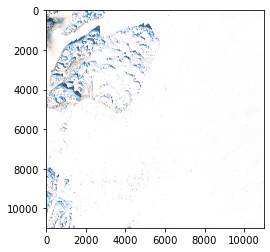

In [5]:
plt.imshow(__normalize_array(rgb.array,'rgb')*2)

In [ ]:
ndbi_filter = ndbi.array < np.percentile(ndbi.array, 75)

In [ ]:
ndbi_filter = ndbi_filter.repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = (rgb.array+1)*ndbi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(normed)

In [ ]:
first = rgb_arr[:,:,0]
second = rgb_arr[:,:,1]
third = rgb_arr[:,:,2]
first = first[first != 0]
second = second[second != 0]
third = third[third != 0]

In [ ]:
final = np.array([first,second,third])

In [ ]:
save('ice_data.npy',final.T)

# Ice 2

In [ ]:
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/icechute/images/2020_07_24/'
rgb_path = folder + 'icechute_RGB.tiff'
ndwi_path = folder + 'icechute_NDWI.tiff'
ndbi_path = folder + 'icechute_NDBI.tiff'

In [ ]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [ ]:
# ndwi = RasterData(ndwi_path)
ndbi = RasterData(ndbi_path)
rgb = RasterData(rgb_path)

In [ ]:
# ndwi_filter = (ndwi.array < np.percentile(ndwi.array, 50)).repeat(2, axis=0).repeat(2, axis=1)
ndbi_filter = (ndbi.array < np.percentile(ndbi.array, 50)).repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = (rgb.array+1)*ndbi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(normed)

In [ ]:
first = rgb_arr[:,:,0]
second = rgb_arr[:,:,1]
third = rgb_arr[:,:,2]
first = first[first != 0]
second = second[second != 0]
third = third[third != 0]
final = np.array([first,second,third])
save('ice_data.npy', final.T)

In [ ]:
good = rgb_arr[:,:,:] != [0,0,0]

In [ ]:
t = rgb_arr[good]

In [ ]:
t.shape

In [ ]:
rgb_arr[~(rgb_arr==0).all(1)]


# Water Data Creator

In [ ]:
ice_path = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/water8/images/2020_07_31/'
ndvi_path = ice_path + 'water8_NDVI.tiff'
ndbi_path = ice_path + 'water8_NDBI.tiff'
rgb_path = ice_path + 'water8_RGB.tiff'
ndwi_path = ice_path + 'water8_NDWI.tiff'

In [1]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [ ]:
ndwi = RasterData(ndwi_path)
rgb = RasterData(rgb_path)

In [ ]:
ndwi_filter = ndwi.array > np.percentile(ndwi.array, 79)
ndwi_filter = ndwi_filter.repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = rgb.array*ndwi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(normed)

In [ ]:
first = rgb_arr[:,:,0]
second = rgb_arr[:,:,1]
third = rgb_arr[:,:,2]
first = first[first != 0]
second = second[second != 0]
third = third[third != 0]

In [ ]:
final = np.array([first,second,third])
final.T.shape

In [ ]:
save('water_data2.npy',final.T)

# Create Ground Data

In [ ]:
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/mountain3/images/2020_08_12/'
ndvi_path = folder + 'mountain3_NDVI.tiff'
ndbi_path = folder + 'mountain3_NDBI.tiff'
rgb_path = folder + 'mountain3_RGB.tiff'

In [ ]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [ ]:
ndvi = RasterData(ndvi_path)
ndbi = RasterData(ndbi_path)
rgb = RasterData(rgb_path)

In [ ]:
ndvi_filter = ndvi.array < np.percentile(ndvi.array, 40)
ndbi_filter = (ndbi.array > np.percentile(ndvi.array, 30)
              ).repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = rgb.array*ndvi_filter*ndbi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [ ]:
first = rgb_arr[:,:,0]
second = rgb_arr[:,:,1]
third = rgb_arr[:,:,2]
first = first[first != 0]
second = second[second != 0]
third = third[third != 0]

In [ ]:
final = np.array([first,second,third])
final.T.shape

In [ ]:
# save("ground_data.npy",final.T)

# Ground Data 2

In [ ]:
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/iceland_mountain/images/2020_08_14/'
ndvi_path = folder + 'iceland_mountain_NDVI.tiff'
ndbi_path = folder + 'iceland_mountain_NDBI.tiff'
rgb_path = folder + 'iceland_mountain_RGB.tiff'

In [ ]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [ ]:
ndvi = RasterData(ndvi_path)
ndbi = RasterData(ndbi_path)
rgb = RasterData(rgb_path)

In [ ]:
ndvi_filter = ndvi.array < np.percentile(ndvi.array, 50)
ndbi_filter = (ndbi.array > np.percentile(ndbi.array, 50)
              ).repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = rgb.array*ndvi_filter*ndbi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [ ]:
first = rgb_arr[:,:,0]
second = rgb_arr[:,:,1]
third = rgb_arr[:,:,2]
first = first[first != 0]
second = second[second != 0]
third = third[third != 0]

final = np.array([first,second,third])
save('ground_data.npy',final.T)

# More Ground Data

In [ ]:
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/icechute/images/2020_08_06/'

In [ ]:
ndvi_path = folder + 'icechute_NDVI.tiff'
ndbi_path = folder + 'icechute_NDBI.tiff'
ndwi_path = folder + 'icechute_NDWI.tiff'
rgb_path = folder + 'icechute_RGB.tiff'

In [ ]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [ ]:
ndwi = RasterData(ndwi_path)
ndbi = RasterData(ndbi_path)
rgb = RasterData(rgb_path)

In [ ]:
ndwi_filter = (ndwi.array < np.percentile(ndwi.array, 10)).repeat(2, axis=0).repeat(2, axis=1)
# ndbi_filter = (ndbi.array > np.percentile(ndbi.array, 80)).repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = (rgb.array)*ndwi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [ ]:
rgb_arr[np.all(rgb_arr, axis=2)].shape

In [ ]:
final = rgb_arr[np.all(rgb_arr, axis=2)]

In [ ]:
final.shape

In [ ]:
save('ground_data.npy',final)

## Water Data 2

In [ ]:
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/water3/images/2020_08_22/'
rgb_path = folder + 'water3_RGB.tiff'
ndwi_path = folder + 'water3_NDWI.tiff'

In [ ]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [ ]:
ndwi = RasterData(ndwi_path)
rgb = RasterData(rgb_path)

In [ ]:
ndwi_filter = (ndwi.array > np.percentile(ndwi.array, 60)).repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = rgb.array*ndwi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [ ]:
first = rgb_arr[:,:,0]
second = rgb_arr[:,:,1]
third = rgb_arr[:,:,2]
first = first[first != 0]
second = second[second != 0]
third = third[third != 0]

In [ ]:
final = np.array([first,second,third])
save('water_data11.npy', final.T)

# Ground Data

In [ ]:
fod = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/test3/images/2020_09_04/'
rgb_path = fod + 'test3_RGB.tiff'
ndwi_path = fod + 'test3_NDWI.tiff'
ndbi_path = fod + 'test3_NDBI.tiff'

In [ ]:
ndwi = RasterData(ndwi_path)
ndbi = RasterData(ndbi_path)
rgb = RasterData(rgb_path)

In [ ]:
ndwi_filter = (ndwi.array > np.percentile(ndwi.array, 50)).repeat(2, axis=0).repeat(2, axis=1)

In [ ]:
rgb_arr = (rgb.array+1)*ndwi_filter

In [ ]:
normed = __normalize_array(rgb_arr, 'rgb')
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [ ]:
final = rgb_arr[np.all(rgb_arr, axis=2)]

In [ ]:
save('ground_data_new.npy',final)

In [ ]:
rgb_arr.shape

In [ ]:
10980*10980

In [ ]:
final.shape

In [3]:
# Green
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [33]:
# folder = '../projects/fire/images/cropped/2020_10_24/'
folder = '../projects/fire/images/2020_10_24/cropped/'
rgb_path = folder + 'fire_RGB_Cropped.tiff'
ndvi_path = folder + 'fire_NDVI_Cropped.tiff'

In [34]:
ndvi = RasterData(ndvi_path)
rgb = RasterData(rgb_path)

In [43]:
ndvi_filter = ndvi.array < np.percentile(ndvi.array, 5)

In [44]:
rgb_arr = (rgb.array+1)*ndvi_filter

In [45]:
normed = __normalize_array(rgb_arr, 'rgb')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


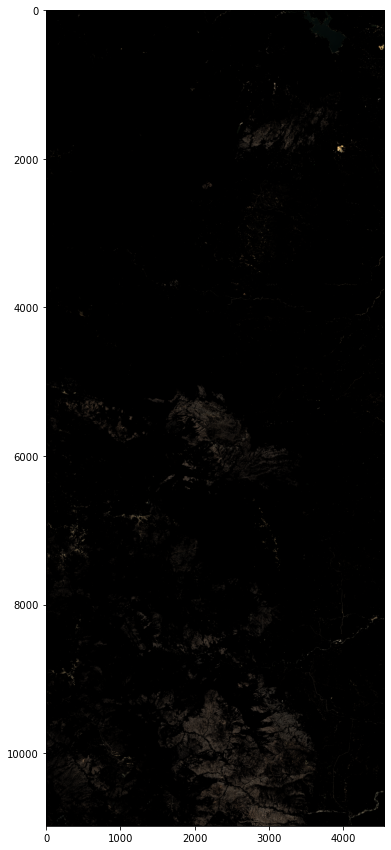

In [46]:
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [47]:
final = rgb_arr[np.all(rgb_arr, axis=2)]

In [49]:
save('burned.npy', final.T)

In [48]:
final.T.shape

(3, 2498887)

In [3]:
# folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/forest/images/2020_09_22/'
folder = '/mnt/alex/ssd/Machine learning/satelliteImagery/projects/montreal/images/2019_09_18/'
rgb_path = folder + 'montreal_RGB.tiff'
ndvi_path = folder + 'montreal_NDVI.tiff'

In [4]:
ndvi = RasterData(ndvi_path)
rgb = RasterData(rgb_path)

In [9]:
ndvi_filter = ndvi.array > np.percentile(ndvi.array, 70)

In [10]:
rgb_arr = (rgb.array+1)*ndvi_filter

In [11]:
normed = __normalize_array(rgb_arr, 'rgb')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


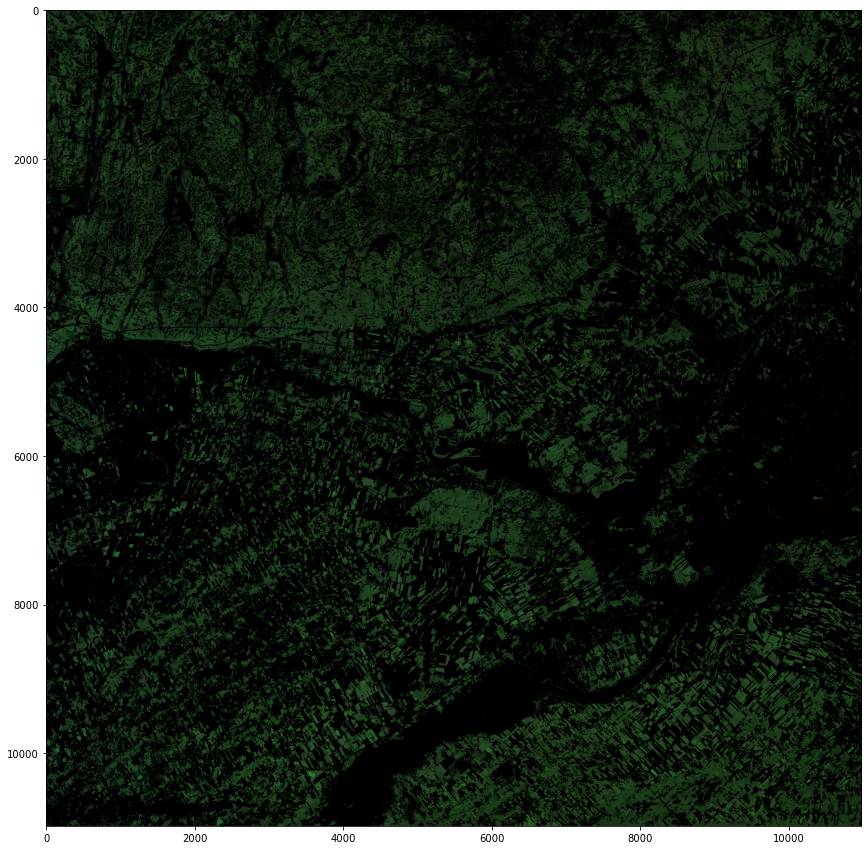

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(normed*10)

In [13]:
final = rgb_arr[np.all(rgb_arr, axis=2)]

In [14]:
final.shape

(36167888, 3)

In [15]:
final[0]

array([283., 579., 257.])

In [18]:
selection = np.random.randint(0,final.shape[0], 10000000)


In [19]:
selection.shape

(10000000,)

In [21]:
final[selection].shape

(10000000, 3)

In [22]:
save('green_selection.npy', final[selection].T)

In [1]:
from raster_data import RasterData
import numpy as np
from display import __normalize_array
import matplotlib.pyplot as plt
from numpy import save

In [2]:
folder = '../projects/california_forest/images/2020_07_06/'
rgb_path = folder + 'california_forest_RGB.tiff'
ndvi_path = folder + 'california_forest_NDVI.tiff'

In [3]:
ndvi = RasterData(ndvi_path)
rgb = RasterData(rgb_path)

In [4]:
ndvi_filter = ndvi.array < np.percentile(ndvi.array, 50)
rgb_arr = (rgb.array+1)*ndvi_filter

In [5]:
normed = __normalize_array(rgb_arr, 'rgb')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


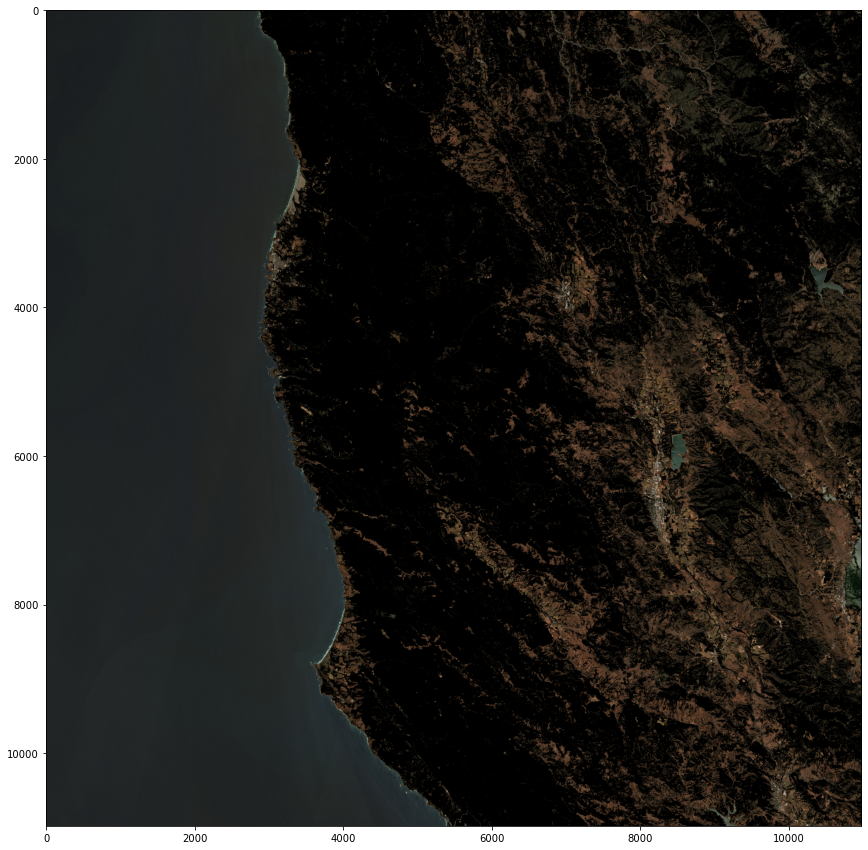

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [8]:
final = rgb_arr[np.all(rgb_arr, axis=2)]

In [9]:
final.shape
selection = np.random.randint(0,final.shape[0], 10000000)

In [10]:
final[selection]
save('california_dry.npy', final[selection]
)

# Desert

In [7]:
folder = '../projects/desert/images/2020_11_04/'
rgb_path = folder + 'desert_RGB.tiff'
ndvi_path = folder + 'desert_NDVI.tiff'

In [8]:
ndvi = RasterData(ndvi_path)
rgb = RasterData(rgb_path)

In [9]:
ndvi_filter = ndvi.array < np.percentile(ndvi.array, 40)
rgb_arr = (rgb.array+1)*ndvi_filter

In [5]:
normed = __normalize_array(rgb_arr, 'rgb')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


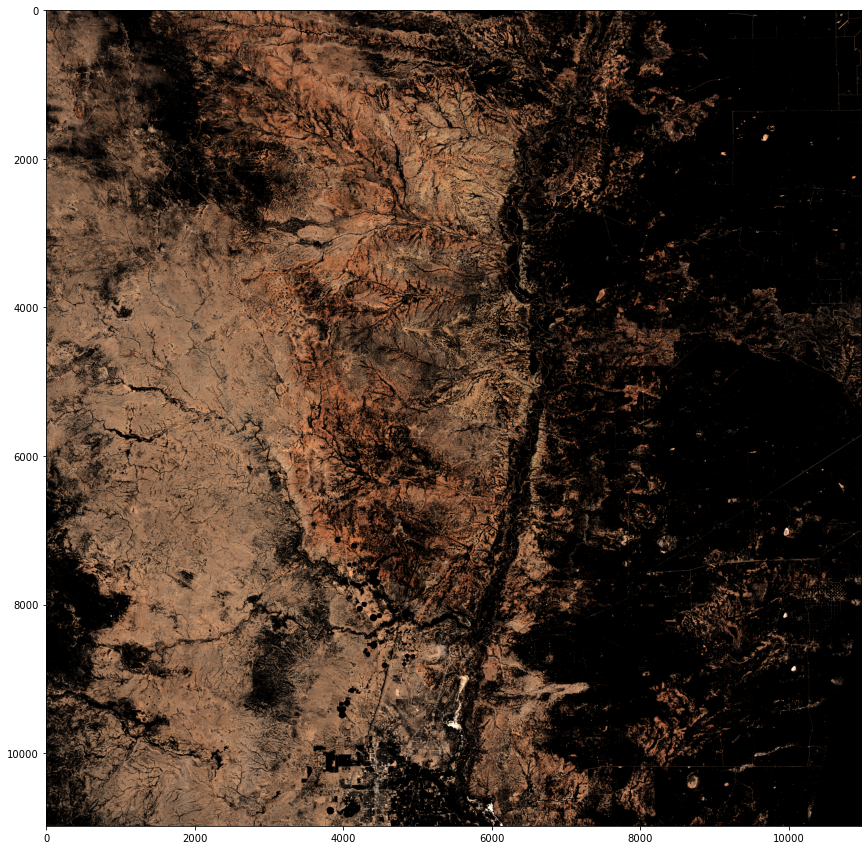

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(normed*5)

In [10]:
final = rgb_arr[np.all(rgb_arr, axis=2)]

In [11]:
final.shape
selection = np.random.randint(0,final.shape[0], 10000000)

In [12]:
final[selection]
save('desert_nevada.npy', final[selection])